In [2]:
print("Testing Color Assignment")

Testing Color Assignment


In [11]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

In [12]:
img_path = '../outputs/cropped_players/player_1.jpg'
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

(np.float64(-0.5), np.float64(45.5), np.float64(96.5), np.float64(-0.5))

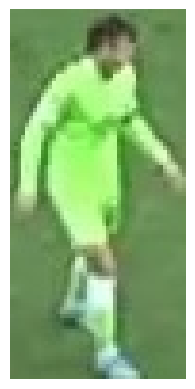

In [5]:
plt.imshow(img)
plt.axis('off')

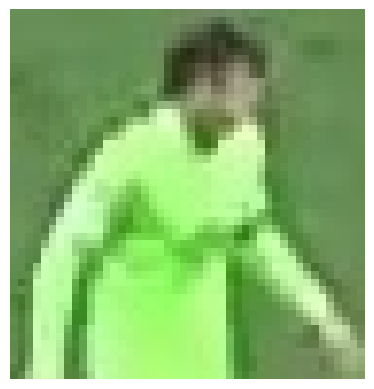

In [10]:
# Take Top half of the image to exract the jersey color
top_panel = img[0:int(img.shape[0]/2),:]
plt.axis('off')
plt.imshow(top_panel)
plt.show()

## Create the cluster if the image into 2 cluster

In [13]:
#Reshare the image to 2D array
img_2d = top_panel.reshape((-1,3))

# Perform K-Means cluster with 2 cluster
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(img_2d)

# Get cluster labels
labels = kmeans.labels_

# Reshape the labels to the original image shape
segmented_image = labels.reshape(top_panel.shape[0], top_panel.shape[1])    


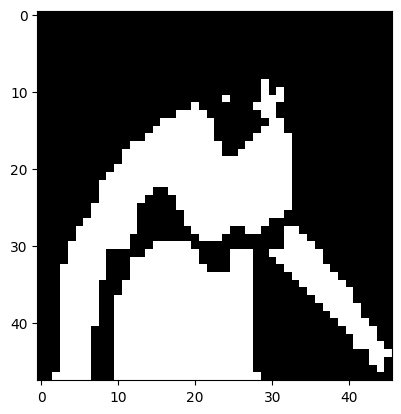

In [19]:
# Display the segmented image
plt.imshow(segmented_image, cmap='gray')
plt.show()

In [20]:
# Corner Cluster 
corner_clusters=[segmented_image[0,0],segmented_image[0,-1],segmented_image[-1,0],segmented_image[-1,-1]]

non_player_cluster = max(set(corner_clusters), key=corner_clusters.count)
print(f'Non Player Cluster: {non_player_cluster}')

Non Player Cluster: 0


In [22]:
player_cluster = 1 - non_player_cluster 
print(f'Player Cluster: {player_cluster}')

Player Cluster: 1


In [23]:
kmeans.cluster_centers_[player_cluster]

array([176.15084525, 242.43823147, 140.49674902])

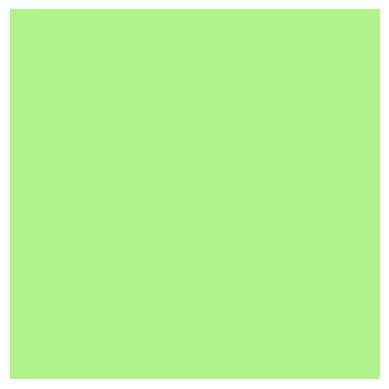

In [24]:
# Show the Color
color = np.zeros((100,100,3), dtype='uint8')
color[:,:] = kmeans.cluster_centers_[player_cluster]
plt.imshow(color)
plt.axis('off')
plt.show()